# 项目2: 学习使用kNN算法进行数据分类和回归

%pip install -r requirements

安装numpy、pandas等基础库

In [1]:
import numpy as np
import pandas as pd 

df_heart = pd.read_csv("./data/heart/heart.csv")

df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
# 构建特征和标签集
y = df_heart.target.values
X = df_heart.drop(['target'], axis = 1)

from sklearn.model_selection import train_test_split # 拆分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
K = 5

KNN = KNeighborsClassifier(n_neighbors=K)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)

print(y_pred)
print(y_test)


[0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0
 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0]
[0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0
 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1]


In [7]:
from sklearn.metrics import (f1_score, confusion_matrix)

print("{}NN预测准确率:{:.2f}%".format(K, KNN.score(X_test, y_test)*100))
print("{}NN预测F1分数:{:.2f}%".format(K, f1_score(y_test, y_pred)*100))
print("KNN混淆矩阵:\n", confusion_matrix(y_pred, y_test))


5NN预测准确率:63.93%
5NN预测F1分数:66.67%
KNN混淆矩阵:
 [[17 12]
 [10 22]]


In [15]:
# 寻找最佳的K值

f1_score_list = []
acc_score_list = [] # 准确率分数

for k in range (1, 15):
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(X_train, y_train)
    
    acc_score_list.append(KNN.score(X_test, y_pred))
    y_pred = KNN.predict(X_test)
    f1_score_list.append(f1_score(y_test, y_pred))


/var/folders/5r/1m67q6wn6yjbm75v3ydwx8yc0000gq/T/ipykernel_28637/376840197.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="target", data=df_heart, palette="bwr")


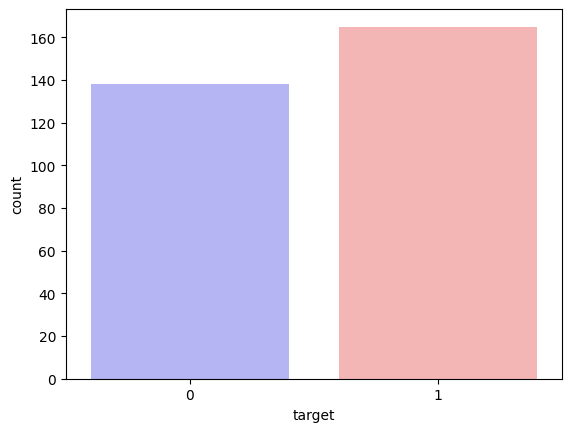

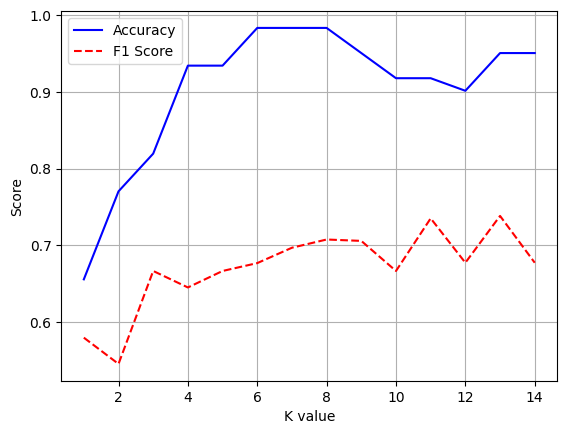

Maximum kNN Score is 73.85%


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns #导入seaborn画图工具箱
sns.countplot(x="target", data=df_heart, palette="bwr")
plt.show()

index = np.arange(1, 15, 1)
plt.plot(index,acc_score_list,c='blue',linestyle='solid')
plt.plot(index,f1_score_list,c='red',linestyle='dashed')
plt.legend(["Accuracy", "F1 Score"])
plt.xlabel("K value")
plt.ylabel("Score")
plt.grid('false')
plt.show()
kNN_acc = max(f1_score_list)*100
print("Maximum kNN Score is {:.2f}%".format(kNN_acc))


